The following cell should always be the first coding cell of your python notebooks

In [9]:
%matplotlib inline 
# plots graphs within the notebook
%config InlineBackend.figure_format='svg' # not sure what this does, may be default images to svg format

from IPython.display import display,Image, Latex

from IPython.core.display import HTML
def header(text):
    raw_html = '<h4>' + str(text) + '</h4>'
    return raw_html

def box(text):
    raw_html = '<div style="border:1px dotted black;padding:2em;">'+str(text)+'</div>'
    return HTML(raw_html)

def nobox(text):
    raw_html = '<p>'+str(text)+'</p>'
    return HTML(raw_html)

def addContent(raw_html):
    global htmlContent
    htmlContent += raw_html
    
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 18,
        }

from IPython.display import clear_output

import SchemDraw as schem
import SchemDraw.elements as e

import matplotlib.pyplot as plt
import numpy as np

from scipy.constants.constants import C2K
from scipy.constants.constants import K2C
from scipy.constants.constants import F2K
from scipy.constants.constants import K2F

In [3]:
student_id = raw_input('Please enter your NETID (e.g. ydubief)')

Please enter your NETID (e.g. ydubief)ydubief


In [4]:
print(student_id)

ydubief


<h3> Heat loss through a single-pane window</h3>

Consider a 0.8 m high and 1.5 m wide window with a thickness of 8 mm and a thermal conductivity of $k=0.78$ W/m.K. The room maintained at 20$^\circ$ C and the outside is at -10$^\circ$ C. The inner and outer convection coefficients are $h_1=10$ W/m$^2$.K and $h_2=40$ W/m$^2$.K
<ol>
<li> Draw the thermal circuit of the problem.</li>
<li> Compute the heat transfer through the window.</li>
<li> Plot the temperature distribution across the window glass.</li>
</ol>

In [5]:
PDF('figures/window-single-pane-fig.pdf',size=(600,500))

####Parameters

In [ ]:
H = 0.8 #m Height
W = 1.5 #m Width
t = 8e-3 #m window thickness

A = L*W #m^2 window surface area
k_glass = 0.78 #W/m.K thermal conductivity of glass

T_inf_in = 20 #C
T_inf_out = -10 #C


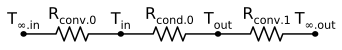

In [64]:

from Libraries import HT_thermal_resistance as res
from Libraries import thermodynamics as thermo

Rth = []
Rth.append(res.Resistance('$R_{conv.0}$'))
Rth.append(res.Resistance('$R_{cond.0}$'))
Rth.append(res.Resistance('$R_{conv.1}$'))
d = schem.Drawing()
d.add( e.DOT, label='$T_{\infty.in}$')
d.add( e.RES, d='right', label=Rth[0].name )
d.add( e.DOT, label='$T_{in}$')
d.add( e.RES, d='right', label=Rth[1].name )
d.add( e.DOT, label='$T_{out}$')
d.add( e.RES, d='right', label=Rth[2].name )
d.add( e.DOT, label='$T_{\infty.out}$')
d.draw()


#d.save( 'testschematic.eps' )

In [29]:
from IPython.display import Latex
Latex(string)
Latex(r"""$$q=\frac{1}{R_{tot}}(T_{\infty,in}-T_{\infty,out})$$""")

<IPython.core.display.Latex object>

In [9]:
Rth[0].convection(h_0,A)
Rth[1].conduction('plane',k,h,0.,A)
Rth[2].convection(h_1,A)

Rtotal = res.serial_sum(Rth,0,2)
print(Rtotal)
q = (T_inf_in-T_inf_out)/Rtotal
T_in = T_inf_in-q*Rth[0].R
print(T_in)
print(q)

0.112713675214
-2.18009478673
266.161137441


R_{conv.0}


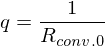

In [67]:
from __future__ import division
import sympy as sym
from sympy import *
var = Rth[0].name
print(var[1:-1])
R = symbols(var[1:-1])
q = symbols('q')
#f, g, h = map(Function, 'fgh')
eq = Eq(q,1/R)
eq

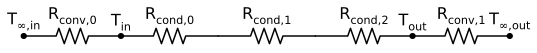

In [4]:
import SchemDraw as schem
import SchemDraw.elements as e

from Libraries import HT_thermal_resistance as res
from Libraries import thermodynamics as thermo

L = 0.8
W = 1.5

A = L*W
h = 8.e-3
h_0 =10.
h_1 = 40.
k_glass = 0.78
T_inf_in = 20.
T_inf_out = -10.
Rth = []
Rth.append(res.Resistance('$R_{conv,0}$'))
Rth.append(res.Resistance('$R_{cond,0}$'))
Rth.append(res.Resistance('$R_{cond,1}$'))
Rth.append(res.Resistance('$R_{cond,2}$'))
Rth.append(res.Resistance('$R_{conv,1}$'))
d = schem.Drawing()
d.add( e.DOT, label='$T_{\infty,in}$')
d.add( e.RES, d='right', label=Rth[0].name )
d.add( e.DOT, label='$T_{in}$')
d.add( e.RES, d='right', label=Rth[1].name )
d.add( e.RES, d='right', label=Rth[2].name )
d.add( e.RES, d='right', label=Rth[3].name )
d.add( e.DOT, label='$T_{out}$')
d.add( e.RES, d='right', label=Rth[4].name )
d.add( e.DOT, label='$T_{\infty,out}$')
d.draw()
#d.save( 'testschematic.eps' )

In [5]:
import numpy as np
from scipy.constants.constants import C2K
from scipy.constants.constants import K2C
from scipy.constants.constants import F2K
from scipy.constants.constants import K2F
gas = thermo.Fluid('krypton')
T_f = 0.5*(T_inf_in+T_inf_out)
print(T_f)
gas.get_properties(C2K(3.9))
k_gas = gas.k
h_gas = 8e-3
Rth[0].convection(h_0,A)
Rth[1].conduction('plane',k_glass,h,0.,A)
Rth[2].conduction('plane',k_gas,h_gas,0.,A)
Rth[3].conduction('plane',k_glass,h,0.,A)
Rth[4].convection(h_1,A)

Rtotal = res.serial_sum(Rth,0,4)
print(Rtotal)
q = (T_inf_in-T_inf_out)/Rtotal
T_in = T_inf_in-q*Rth[0].R
T_0 = T_in - q*Rth[1].R
T_1 = T_0 - q*Rth[2].R
print(T_in,T_0,T_1,0.5*(T_0+T_1))
print(q)

5.0
0.883004391282
(17.168757002021742, 16.878373104793202, -9.0018053532768931, 3.9382838757581542)
33.9749159757


ok
(497505.78966666822, 4.8354664449585139)
2.38388495736
0.470830125339
(14.690229308927584, 14.145637443176568, -8.1279654614808798, 3.0088359908478441)
63.7172482929


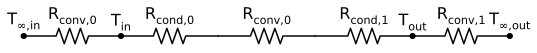

In [11]:

from Libraries import HT_natural_convection_enclosure as ncconvenc
t = 0.008
H = 0.05
T_f = 0.5*(T_inf_in+T_inf_out)
air = thermo.Fluid('air')
air.get_properties(C2K(T_f))
Ra_H = ncconvenc.Ra(9.81,air.beta,T_inf_in-T_inf_out,H,air.nu,air.alpha)
Nu = ncconvenc.Nu_vertical_enclosure(Ra_H,air.Pr,L,H)
print(Ra_H,Nu)
h = air.k*Nu/H
print(h)
Rth = []
Rth.append(res.Resistance('$R_{conv,0}$'))
Rth.append(res.Resistance('$R_{cond,0}$'))
Rth.append(res.Resistance('$R_{conv,0}$'))
Rth.append(res.Resistance('$R_{cond,1}$'))
Rth.append(res.Resistance('$R_{conv,1}$'))
d = schem.Drawing()
d.add( e.DOT, label='$T_{\infty,in}$')
d.add( e.RES, d='right', label=Rth[0].name )
d.add( e.DOT, label='$T_{in}$')
d.add( e.RES, d='right', label=Rth[1].name )
d.add( e.RES, d='right', label=Rth[2].name )
d.add( e.RES, d='right', label=Rth[3].name )
d.add( e.DOT, label='$T_{out}$')
d.add( e.RES, d='right', label=Rth[4].name )
d.add( e.DOT, label='$T_{\infty,out}$')
d.draw()
Rth[0].convection(h_0,A)
Rth[1].conduction('plane',k_glass,t,0.,A)
Rth[2].convection(h,A)
Rth[3].conduction('plane',k_glass,t,0.,A)
Rth[4].convection(h_1,A)

Rtotal = res.serial_sum(Rth,0,4)
print(Rtotal)
q = (T_inf_in-T_inf_out)/Rtotal
T_in = T_inf_in-q*Rth[0].R
T_0 = T_in - q*Rth[1].R
T_1 = T_0 - q*Rth[2].R
print(T_in,T_0,T_1,0.5*(T_0+T_1))
print(q)

In [7]:
array = np.genfromtxt('Libraries/Tables/Argon1atm.csv', delimiter=',', skip_header = 1, unpack=True, dtype=float)

In [9]:
air.get_properties(C2K(7.))
H =0.02
print H
Ra_H = ncconvenc.Ra(9.81,air.beta,10.,H,air.nu,air.alpha)
Nu = ncconvenc.Nu_vertical_enclosure(Ra_H,air.Pr,L,H)
print(Ra_H,Nu)
print(air.beta,air.nu,air.alpha,air.Pr)

0.02
ok
(10266.866451170234, 1.3922489026368055)
(0.0035695163305372126, 1.39335e-05, 1.9582594579738715e-05, 0.71150193653624427)
